# A whirlwind tour of classifier families, part 1

## Linear models

The simplest and easiest models to understand are linear models. A linear model hypothesizes that the relationship between your output variable $y$ and your input variables $x_1, x_2, \dots, x_n$ can be expressed in the following form:

$$y \sim a_0 + a_1x_1 + a_2x_2 + \dots + \epsilon$$

The expression on the right is a **linear combination** of the input variables, plus an error term that is expressed by $\epsilon$. 

$a_0, a_1, ..., a_n$ are the **parameters** or **coefficients** whose values are determined when fitting the model. 

When we limit the input variables $x_i$ to two and assume that they can take on any numerical value, we can plot this linear combination as a line (hence, the name "linear"). Increasing the number of input variables to three, it corresponds to a plane. For four or more variables, it is called a hyperplane. (Incidentally, this connection between geometry and algebra is why variables in your data set can also be called **dimensions**.) However, to make it easy to visualize, we will assume that there are only two quantitative input variables, $x_1$ and $x_2$. 

Because we are discussing classifiers, we assume that $y$ is a qualitative variable, which is usually represented by a numerical code that corresponds to one of the **categories** or **classes**. To simplify the discussion, we will assume that there are only two possible classes for the output variable $y$.

In [1]:
blue_x1 <- rnorm(50, mean=4, sd=2)
orange_x1 <- rnorm(50, mean=6, sd=2)
blue_x2 <- rnorm(50, mean=7, sd=2)
orange_x2 <- rnorm(50, mean=3, sd=2)
data <- data.frame(
    x1 = c(blue_x1, orange_x1), 
    x2 = c(blue_x2, orange_x2),
    y = as.factor(c(rep("blue", 50), rep("orange", 50)))
)

### Linear discriminant analysis (LDA)

This family of classifiers bears some relationship to your classic linear regression (what you use to generate a "best fit line" in Microsoft Excel or Google Sheets) or ANOVA if you took introductory statistics.

* **Linear regression** is used when your output variable is quantitative
* **ANOVA** is a special case of linear regression where all your input variables are qualitative

Let's assume the following:

* $y$ can be one of two classes, `blue` or `orange` (color scheme adopted from [ESLE](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf))
* two quantitative input variables $x_1$ and $x_2$

The points in our training set are plotted below.

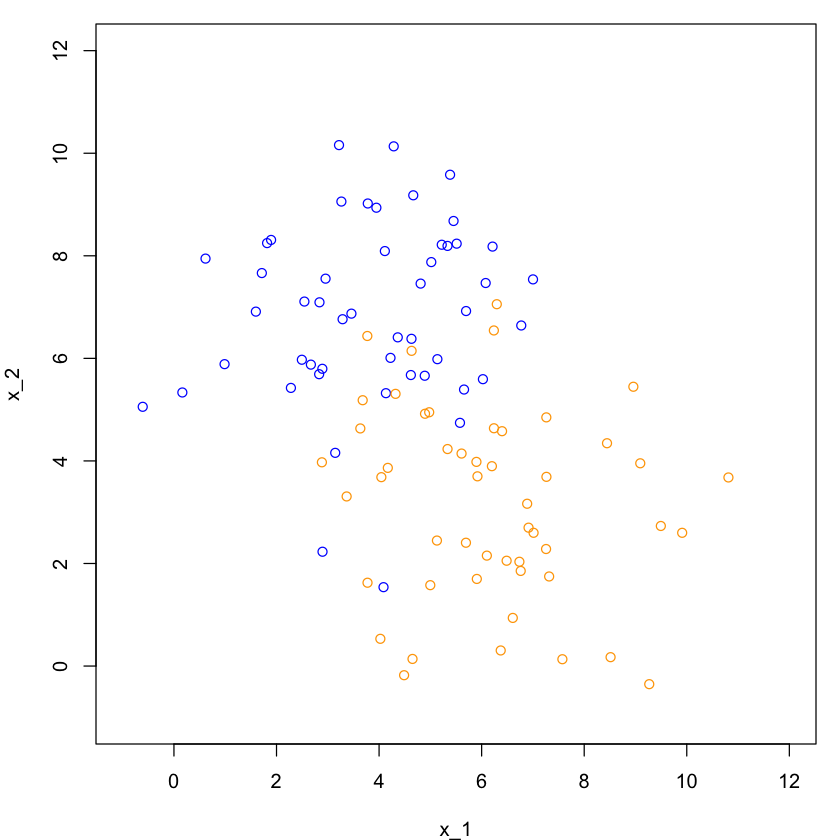

In [2]:
par(mar=c(4,4,1,1))
plot(blue_x1, blue_x2, col="blue", xlab="x_1", ylab="x_2", xlim=c(-1,12), ylim=c(-1,12))
points(orange_x1, orange_x2, col="orange")

**Linear discriminant analysis** (LDA) methods try to find a line $a_0 + a_1x_1 + a_2x_2 = 0$ such that:

$$y = \begin{cases} 
\text{blue}, & \text{if $a_0 + a_1x_1 + a_2x_2 < 0$}\\
\text{orange}, & \text{if $a_0 + a_1x_1 + a_2x_2 \geq 0$}
\end{cases}$$

that maximizes the difference between the mean of all the `blue` points and the mean of all the `orange` points.

In the plot below, the line represents the fitted model, and the solid circles represent the means of the `blue` and `orange` classes.

Loading required package: MASS


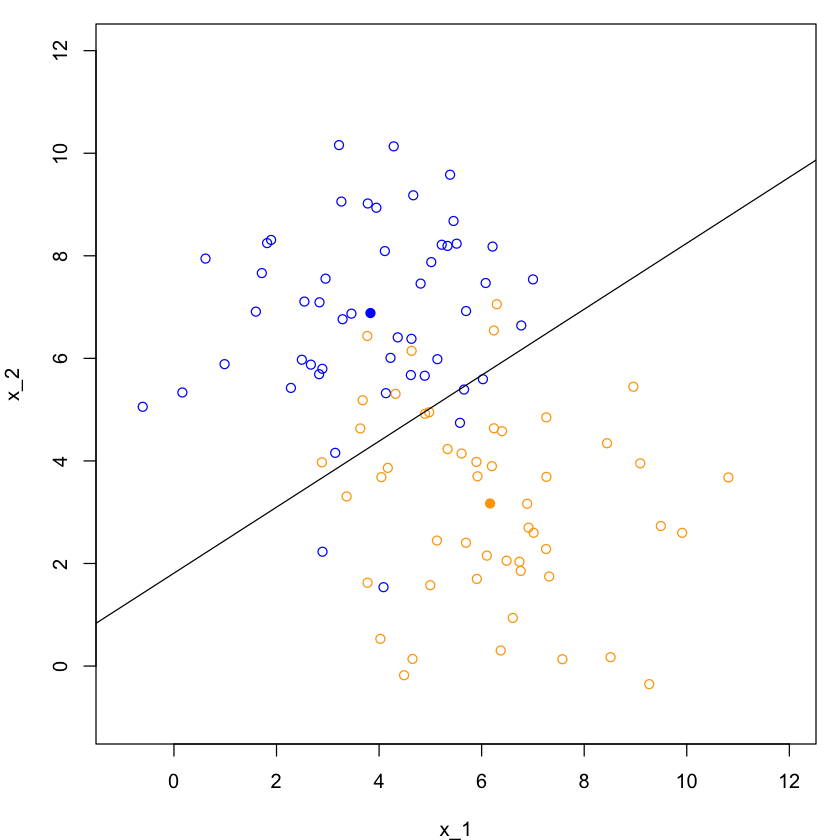

In [3]:
require(MASS)
lda_model <- lda(y ~ x1 + x2, data)
lda_slope <- -lda_model$scaling["x1",]/lda_model$scaling["x2",]
lda_intercept <- (lda_model$prior %*% lda_model$means %*% lda_model$scaling)/lda_model$scaling["x2",]

par(mar=c(4,4,1,1))
plot(blue_x1, blue_x2, col="blue", xlab="x_1", ylab="x_2", xlim=c(-1,12), ylim=c(-1,12))
points(orange_x1, orange_x2, col="orange")
points(c(lda_model$means["blue","x1"]), c(lda_model$means["blue","x2"]), pch=19, col="blue")
points(c(lda_model$means["orange","x1"]), c(lda_model$means["orange","x2"]), pch=19, col="orange")
abline(a=lda_intercept, b=lda_slope)

One important caveat for using LDA methods is that they assume your inputs are **normally distributed**: a histogram of their values looks like a bell curve.

### Support vector machines (SVM)

**Support vector machines (SVM)** are a different family of linear classifiers that also fit a linear combination of input variables to distinguish between the output classes. However, instead of maximizing the difference between the means, they maximize the margin or separation between the two classes.

Using the same training set as above, the solid line in the plot below represents the fitted model using SVM. Compare to the dotted line for the fitted model using LDA.

Loading required package: e1071


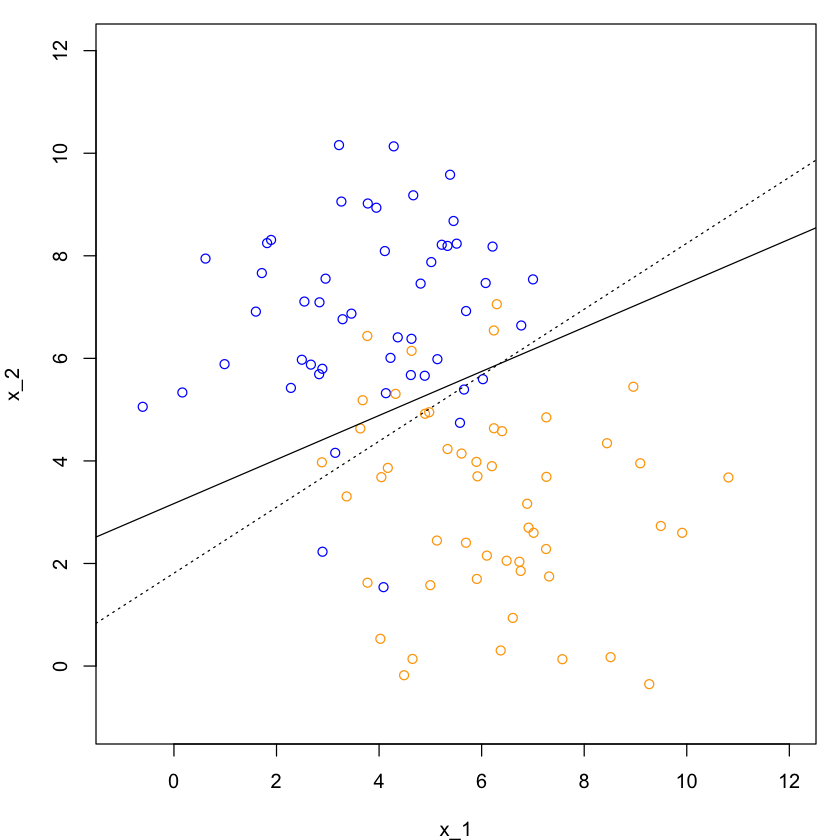

In [4]:
require(e1071)
svm_model <- svm(y ~ x1 + x2, data, scale=FALSE, kernel="linear")
svm_coefs <- coef(svm_model)
svm_slope <- -svm_coefs[2]/svm_coefs[3]
svm_intercept <- -svm_coefs[1]/svm_coefs[3]

par(mar=c(4,4,1,1))
plot(blue_x1, blue_x2, col="blue", xlab="x_1", ylab="x_2", xlim=c(-1,12), ylim=c(-1,12))
points(orange_x1, orange_x2, col="orange")
abline(a=lda_intercept, b=lda_slope, lty="dotted")
abline(a=svm_intercept, b=svm_slope)

Unlike LDA, SVM methods do not assume normally distributed input variables.